## 통계학 실험 9장 과제 

####  1.  (run10samp.txt) 자료를 이용한 예제

주어진 자료는 2012년 Washington, DC에서 열렸던 Cherry Blossom 10 mile run 경기에서 완주를 한 선수 100명의 자료이다. 주요 변수에 대한 설명은 다음과 같다.

|  변수명       |        설명              |
|--------|:-------------------------------------|
| time |  10 마일 달리기 완주 기록 (분)       |
| age | 선수 나이   |
| gender | 성별 (M=남성, F=여성) |
| state | 출신 지역 |


In [1]:
import lzma
import pandas as pd

(data := pd.read_csv(lzma.open('run10samp.txt.xz'), sep=' '))

,time,age,gender,state
1,88.31,59,M,MD
2,100.67,32,M,VA
3,109.52,33,F,VA
4,87.11,52,M,PA
5,73.02,40,M,DC
...,...,...,...,...
96,90.47,35,F,VA
97,94.32,28,F,VA
98,96.19,32,F,DC
99,104.31,32,F,MD


(1) 성별에 따라 완주시간에 차이가 있는지를 일원배치법을 이용하여 유의수준 5%에서 검정해보자. 가설을 세우고 검정통계량(F값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

In [2]:
from statsmodels.formula.api import ols
from statsmodels.api import stats
from IPython.display import Markdown as md

model = ols(
    'time ~ C(gender)',
    data=pd.DataFrame({'time': data.time, 'gender': data.gender})
).fit()
table = stats.anova_lm(model, typ=2)

display(table)

md(r'''
일원배치법(One-way ANOVA)으로 검정해보자.

- 모형: $Y_{ij} = \mu + \alpha_i + \epsilon_{ij}$
  - $\mu$: 모평균
  - $\alpha_i$: $i$번째 성별로 인한 처리효과 $(i = 1, 2)$
  - $\epsilon_{ij}$: 오차항
- 가정:
  - $\sum n_i\alpha_i = 0$
  - $\epsilon_{ij} \overset{\text{iid}}{\sim} N(0, \sigma^2)$
- 가설:
  - $H_0 : \alpha_1 = \alpha_2 = 0$
  - $H_1 : \alpha_1 \neq 0 \; or \; \alpha_2 \neq 0$
- 검정:
  - 검정통계량 : $F = \dfrac{MS_{tr}}{MSE} = \dfrac{SS_{tr}/(k-1)}{SSE/(N-k)}$
''' + f'''\
  - $F$의 관측값 : $f = {model.fvalue}$
  - 유의확률 : $P = {model.f_pvalue}$

유의확률이 5%보다 작으므로 $H_0$는 기각, 성별은 완주 기록에 유의한 처리효과를 준다.

&nbsp;
''')

,sum_sq,df,F,PR(>F)
C(gender),5196.208189,1.0,26.186817,0.000002
Residual,19445.983095,98.0,NaN,NaN



일원배치법(One-way ANOVA)으로 검정해보자.

- 모형: $Y_{ij} = \mu + \alpha_i + \epsilon_{ij}$
  - $\mu$: 모평균
  - $\alpha_i$: $i$번째 성별로 인한 처리효과 $(i = 1, 2)$
  - $\epsilon_{ij}$: 오차항
- 가정:
  - $\sum n_i\alpha_i = 0$
  - $\epsilon_{ij} \overset{\text{iid}}{\sim} N(0, \sigma^2)$
- 가설:
  - $H_0 : \alpha_1 = \alpha_2 = 0$
  - $H_1 : \alpha_1 \neq 0 \; or \; \alpha_2 \neq 0$
- 검정:
  - 검정통계량 : $F = \dfrac{MS_{tr}}{MSE} = \dfrac{SS_{tr}/(k-1)}{SSE/(N-k)}$
  - $F$의 관측값 : $f = 26.186817096914098$
  - 유의확률 : $P = 1.543881978343789e-06$

유의확률이 5%보다 작으므로 $H_0$는 기각, 성별은 완주 기록에 유의한 처리효과를 준다.

&nbsp;


(2) QQ-plot을 이용하여 성별에 따른 완주시간의 분포가 정규분포를 따르는지 확인하시오.

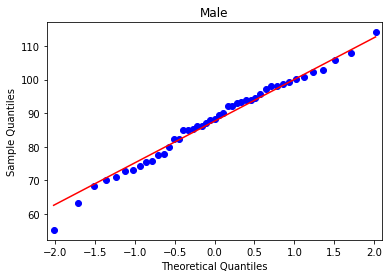

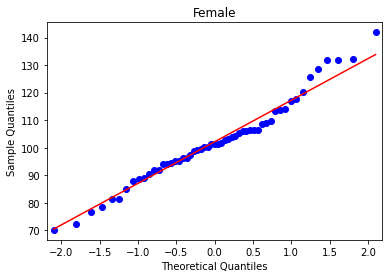


직선을 크게 벗어나지 않아, 남녀 각각의 완주기록 분포가 대체로 정규분포를 따름을 알 수 있다.

&nbsp;


In [3]:
from statsmodels.graphics.gofplots import ProbPlot
from matplotlib import pyplot as plt

ProbPlot(data[data.gender == 'M'].time).qqplot(line='s', lw=1, fmt='b')
plt.title('Male')
plt.show()
ProbPlot(data[data.gender == 'F'].time).qqplot(line='s', lw=1, fmt='b')
plt.title('Female')
plt.show()

md(r'''
직선을 크게 벗어나지 않아, 남녀 각각의 완주기록 분포가 대체로 정규분포를 따름을 알 수 있다.

&nbsp;
''')

(3) 등분산을 가정하고 성별에 따른 완주시간에 차이가 있는지를 t-test를 이용하여 유의수준 5%에서 검정해보자. 가설을 세우고 검정통계량값(t값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

In [4]:
# TODO
from scipy.stats import ttest_ind

t, p = ttest_ind(
    data[data.gender == 'F'].time,
    data[data.gender == 'M'].time,
    equal_var=True)

md(r'''
같은 데이터에 대해 분산분석 대신 이표본에 의한 모평균의 비교를 수행해보자. 분산분석은 기본적으로 두 모평균의 차에 대한 검정을 여러개로 확장한것인데, 이 문제의 경우 모집단이 두개뿐이므로 6장에서 배웠던 두 모평균의 차에 대한 t 검정법을 그대로 활용할 수 있다.

- $X_1 :$ 여성 완주기록 표본
- $X_2 :$ 남성 완주기록 표본
- 가설:
  - $H_0 : μ_1 - μ_2 = 0 $
  - $H_1 : μ_1 - μ_2 \neq 0 $
- 가정:
  - 각 그룹에서의 관측값은 각 모집단에서의 랜덤표본
  - 서로 다른 그룹에서의 관측값들은 독립적으로 관측
  - $X_{1i} \overset{\text{iid}}{\sim} N(\mu_1, \sigma_1^2)$
  - 등분산성: $\sigma_1^2 = \sigma_2^2$
- 검정:
  - 검정통계량: $T = \dfrac{(\overline{X_1} - \overline{X_2}) - \delta_0}{S_p \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$
''' + f'''\
  - $T$의 관측값: $t = {t}$
  - 유의확률: $P = {p}$

유의확률이 5%보다 작으므로 $H_0$는 기각, 남성의 완주기록 평균과 여성의 완주기록 평균 사이에는 통계적으로 유의미한 차이가 존재한다.

&nbsp;
''')


같은 데이터에 대해 분산분석 대신 이표본에 의한 모평균의 비교를 수행해보자. 분산분석은 기본적으로 두 모평균의 차에 대한 검정을 여러개로 확장한것인데, 이 문제의 경우 모집단이 두개뿐이므로 6장에서 배웠던 두 모평균의 차에 대한 t 검정법을 그대로 활용할 수 있다.

- $X_1 :$ 여성 완주기록 표본
- $X_2 :$ 남성 완주기록 표본
- 가설:
  - $H_0 : μ_1 - μ_2 = 0 $
  - $H_1 : μ_1 - μ_2 \neq 0 $
- 가정:
  - 각 그룹에서의 관측값은 각 모집단에서의 랜덤표본
  - 서로 다른 그룹에서의 관측값들은 독립적으로 관측
  - $X_{1i} \overset{\text{iid}}{\sim} N(\mu_1, \sigma_1^2)$
  - 등분산성: $\sigma_1^2 = \sigma_2^2$
- 검정:
  - 검정통계량: $T = \dfrac{(\overline{X_1} - \overline{X_2}) - \delta_0}{S_p \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$
  - $T$의 관측값: $t = 5.117305648181876$
  - 유의확률: $P = 1.5438819783437654e-06$

유의확률이 5%보다 작으므로 $H_0$는 기각, 남성의 완주기록 평균과 여성의 완주기록 평균 사이에는 통계적으로 유의미한 차이가 존재한다.

&nbsp;


(4) (1)에서의 검정통계량 값과 (2)에서의 검정통계량 값은 어떠한 관계가 있고, 왜 이러한 관계가 있는지 쓰시오.

<!--

F-value는 아래와 같이 정의되고, 요약하자면 그룹간 차이 정도를 불확실도로 나눈것이라고 생각할 수 있다.

> $F = \dfrac{MS_{tr}}{MSE} = \dfrac{SS_{tr}/(k-1)}{SSE/(N-k)}$

t-value는 아래와 같이 정의되고, 마찬가지로 평균의 차이를 불확실도로 나눈것이다.

> $T = \dfrac{(\overline{X_1} - \overline{X_2}) - \delta_0}{\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}}$

따라서 매우 유사한 통계량이라고 볼 수 있는데, 다만 F-value는 t-value와 다르게 차이 정도와 불확실도를 약간 변형하여 사용한다는 점이 다르다.

t-value는 분자가 표본평균의 차이이고, 분모는 표준오차 $S_{\overline{X_1} - \overline{X_2}}$로, 차이 정도와 불확실도를 아주 직접적으로 나누어 사용하고있다.

반면 F-value는 처리효과의 분산(표본 평균 간 퍼진 정도)을 잔차의 분산(표본 내에서 퍼진 정도)로 나누어 사용한다. t-value보다 간접적인 값을 사용한다고 볼 수 있는데, 이는 세개 이상의 그룹을 동시에 비교하기 위함이다.

&nbsp;

-->

모집단이 두개뿐($k = 2$)이고 $\delta_0 = 0$ 이며 등분산성을 가정할 수 있는 경우, F-value와 t-value에는 아예 아래와 같은 수학적인 관계가 존재한다.

> $F = T^2$

이 문제에서 구한 예제에서도 성립한다.

- $F = 26.186817096914098$
- $t = 5.117305648181876$
- $t^2 = 26.186817096914133 = F$

이는 아래와 같이 증명할 수 있다.

> $F
= \dfrac{MS_{tr}}{MSE}
= \dfrac{\left(\dfrac{SS_{tr}}{k-1}\right)}{\left(\dfrac{SSE}{N-k}\right)}
= \dfrac{SS_{tr}}{\left(\dfrac{SSE}{N-2}\right)}
= \dfrac{n_1( \overline{y}_{1.} - \overline{y}_{..} )^2 + n_2( \overline{y}_{2.} - \overline{y}_{..} )^2}{\left(\dfrac{\sum_{j=1}^{n_1}{(y_{1j} - \overline{y}_{1.})^2} + \sum_{j=1}^{n_2}{(y_{2j} - \overline{y}_{2.})^2}}{N-2}\right)}
= \dfrac{\dfrac{1}{\dfrac{1}{n_1} + \dfrac{1}{n_2}} (\overline{y}_{1.} - \overline{y}_{2.})^2}{\left( \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2} \right)}
= \dfrac{(\overline{X_1} - \overline{X_2})^2}{S_p^2 \left(\dfrac{1}{n_1} + \dfrac{1}{n_2}\right)}
= T^2$

표본분산의 정의와 $N = n_1 + n_2$, $\overline{y}_{..} = \dfrac{n_1\overline{y}_{1.} + n_2\overline{y}_{2.}}{N}$ 등을 활용하여 수식을 전개하면 $F = T^2$이 증명된다.

&nbsp;


(5) run10Samp의 age를 정확한 나이가 아닌 위의 문제와 같이 연령대로 나누어 볼 것이다. run10Samp의 age열을 나이대로 바꾸시오.(58->5,42->4) \ 나이대와 성별에 따라 완주시간에 차이가 있는지를 반복이 없는 이원배치법을 이용하여 검정하고자 한다. 귀무가설과 대립가설을 쓰시오.

In [5]:
(data2 := pd.DataFrame({'time': data.time, 'gender': data.gender, 'age_by_10': data.age // 10}))

,time,gender,age_by_10
1,88.31,M,5
2,100.67,M,3
3,109.52,F,3
4,87.11,M,5
5,73.02,M,4
...,...,...,...
96,90.47,F,3
97,94.32,F,2
98,96.19,F,3
99,104.31,F,3


반복이 없는 이원배치법(Two-way ANOVA)으로 검정해보자.

- 모형: $Y_{ij} = \mu + \alpha_i + \beta_j + \epsilon_{ij}$
  - $\mu$: 모평균
  - $\alpha_i$: $i$번째 성별로 인한 처리효과 $(i = 1, 2)$
  - $\beta_j$: $j$번째 연령대로 인한 처리효과 $(j = 2, 3, 4, 5, 6)$
  - $\epsilon_{ij}$: 오차항
- 가정:
  - $\sum n_i\alpha_i = \sum n_j\alpha_j = 0$
  - $\epsilon_{ij} \overset{\text{iid}}{\sim} N(0, \sigma^2)$
- 가설:
  - $H_{01} : \alpha_1 = \alpha_2 = 0$
  - $H_{02} : \beta_2 = ... = \beta_6 = 0$
  - $H_{11} : \text{Not } H_{01}$
  - $H_{12} : \text{Not } H_{02}$
  
&nbsp;

(6) 성별과 연령이 완주시간에 영향을 미치는지 유의수준 5%에서 검정해보자. 검정통계량(F값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

In [6]:
display(table := stats.anova_lm(ols('time ~ C(gender) + C(age_by_10)', data=data2).fit(), typ=2))

md(fr'''
- 성별:
  - $F_1 = {table.F['C(gender)']}$
  - $P_1 = {table['PR(>F)']['C(gender)']}$
- 연령대:
  - $F_2 = {table.F['C(age_by_10)']}$
  - $P_2 = {table['PR(>F)']['C(age_by_10)']}$

성별에 의한 처리효과의 경우 유의확률이 5%보다 작으므로 $H_{{01}}$는 기각되었고, 연령대에 의한 처리효과의 경우 유의확률이 5%보다 크므고 $H_{{02}}$는 채택되었다.

성별은 완주 기록에 유의한 처리효과를 주는 반면, 연령대는 그렇지 않은것을 알 수 있다.

&nbsp;
''')

,sum_sq,df,F,PR(>F)
C(gender),5223.076786,1.0,27.062973,0.000001
C(age_by_10),1304.250566,4.0,1.689469,0.158923
Residual,18141.732528,94.0,NaN,NaN



- 성별:
  - $F_1 = 27.06297301675431$
  - $P_1 = 1.149466947857888e-06$
- 연령대:
  - $F_2 = 1.6894686470067526$
  - $P_2 = 0.15892273976002388$

성별에 의한 처리효과의 경우 유의확률이 5%보다 작으므로 $H_{01}$는 기각되었고, 연령대에 의한 처리효과의 경우 유의확률이 5%보다 크므고 $H_{02}$는 채택되었다.

성별은 완주 기록에 유의한 처리효과를 주는 반면, 연령대는 그렇지 않은것을 알 수 있다.

&nbsp;


(7) 성별과 연령에 대한 상호작용 유무를 interaction plot을 통해 확인해보시오

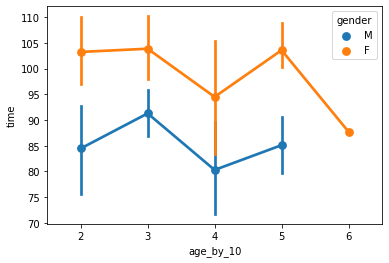


아마도 교호작용이 없는 것 같다.

&nbsp;


In [7]:
from seaborn import pointplot
pointplot(x='age_by_10', y='time', hue='gender', data=data2)
plt.show()

md(r'''
아마도 교호작용이 없는 것 같다.

&nbsp;
''')